### Clustering
    Aim is to identify group of data with similar characteristics
    Performance grouping is carried out in this analysis
    

In [2]:
import warnings 
warnings.simplefilter("ignore")  

import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler 
import matplotlib.pyplot as plt

HRdata=pd.read_csv('HRDataset_v14.csv')
print(HRdata.shape)
HRdata.head().transpose() 

(311, 36)


,0,1,2,3,4
Employee_Name,"Adinolfi, Wilson K","Ait Sidi, Karthikeyan","Akinkuolie, Sarah","Alagbe,Trina","Anderson, Carol"
EmpID,10026,10084,10196,10088,10069
MarriedID,0,1,1,1,0
MaritalStatusID,0,1,1,1,2
GenderID,1,1,0,0,0
EmpStatusID,1,5,5,1,5
DeptID,5,3,5,5,5
PerfScoreID,4,3,3,3,3
FromDiversityJobFairID,0,0,0,0,0
Salary,62506,104437,64955,64991,50825


### Data Preprocessing

In [3]:
HRdata.isnull().sum()

Employee_Name                   0
EmpID                           0
MarriedID                       0
MaritalStatusID                 0
GenderID                        0
EmpStatusID                     0
DeptID                          0
PerfScoreID                     0
FromDiversityJobFairID          0
Salary                          0
Termd                           0
PositionID                      0
Position                        0
State                           0
Zip                             0
DOB                             0
Sex                             0
MaritalDesc                     0
CitizenDesc                     0
HispanicLatino                  0
RaceDesc                        0
DateofHire                      0
DateofTermination             207
TermReason                      0
EmploymentStatus                0
Department                      0
ManagerName                     0
ManagerID                       8
RecruitmentSource               0
PerformanceSco

In [4]:
#dropping irrelevant attributes/which have more than a few unique values
HRdata=HRdata.drop(['Employee_Name','Sex', 'HispanicLatino', 'PositionID','Position','Termd','State', 'Zip', 'DOB', 'Department','DateofHire', 'DateofTermination','TermReason','ManagerName','ManagerID','LastPerformanceReview_Date' , 'DaysLateLast30', 'EngagementSurvey'], axis = 1)

In [5]:
HRdata.head().transpose() 

,0,1,2,3,4
EmpID,10026,10084,10196,10088,10069
MarriedID,0,1,1,1,0
MaritalStatusID,0,1,1,1,2
GenderID,1,1,0,0,0
EmpStatusID,1,5,5,1,5
DeptID,5,3,5,5,5
PerfScoreID,4,3,3,3,3
FromDiversityJobFairID,0,0,0,0,0
Salary,62506,104437,64955,64991,50825
MaritalDesc,Single,Married,Married,Married,Divorced


In [6]:
#Converting columns to numerical values

HRdata['MaritalDesc'] = HRdata['MaritalDesc'].replace({'Single': 1, 'Married': 2,  'Divorced': 3,  'Widowed': 4 , 'Separated': 5})
HRdata['CitizenDesc'] = HRdata['CitizenDesc'].replace({'US Citizen': 1, 'Non-Citizen': 2, 'Eligible NonCitizen': 3})
HRdata['RaceDesc'] = HRdata['RaceDesc'].replace({'White': 0, 'Black or African American': 1, 'American Indian or Alaska Native': 2, 'Asian': 3, 'Hispanic': 4, 'Two or more races': 5})
HRdata['EmploymentStatus'] = HRdata['EmploymentStatus'].replace({'Active': 1, 'Terminated for Cause': 2,  'Voluntarily Terminated': 3})
HRdata['RecruitmentSource'] = HRdata['RecruitmentSource'].replace({'CareerBuilder': 1, 'Diversity Job Fair': 2, 'Employee Referral': 3, 'Google Search': 4, 'Indeed': 5, 'LinkedIn': 5, 'On-line Web application': 6, 'Website': 7, 'Other': 8})
HRdata['PerformanceScore'] = HRdata['PerformanceScore'].replace({'Exceeds': 1, 'Fully Meets': 2, 'Needs Improvement': 3 , 'PIP': 4})


In [7]:
HRdata.head(20).transpose() 

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
EmpID,10026,10084,10196,10088,10069,10002,10194,10062,10114,10250,10252,10242,10012,10265,10066,10061,10023,10055,10245,10277
MarriedID,0,1,1,1,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0
MaritalStatusID,0,1,1,1,2,0,0,4,0,2,1,1,2,0,2,0,1,0,0,0
GenderID,1,1,0,0,0,0,0,1,0,1,0,1,1,1,1,1,0,0,0,1
EmpStatusID,1,5,5,1,5,1,1,1,3,1,5,5,1,1,5,4,2,1,4,3
DeptID,5,3,5,5,5,5,4,5,5,3,5,5,3,5,5,5,5,5,3,5
PerfScoreID,4,3,3,3,3,4,3,3,3,3,3,3,4,3,3,3,4,3,3,3
FromDiversityJobFairID,0,0,0,0,0,0,0,0,1,0,1,1,1,0,0,0,0,0,0,0
Salary,62506,104437,64955,64991,50825,57568,95660,59365,47837,50178,54670,47211,92328,58709,52505,57834,70131,59026,110000,53250
MaritalDesc,1,2,2,2,3,1,1,4,1,3,2,2,3,1,3,1,2,1,1,1


In [8]:
HRdata.isnull().sum()

EmpID                     0
MarriedID                 0
MaritalStatusID           0
GenderID                  0
EmpStatusID               0
DeptID                    0
PerfScoreID               0
FromDiversityJobFairID    0
Salary                    0
MaritalDesc               0
CitizenDesc               0
RaceDesc                  0
EmploymentStatus          0
RecruitmentSource         0
PerformanceScore          0
EmpSatisfaction           0
SpecialProjectsCount      0
Absences                  0
dtype: int64

In [9]:
print(HRdata.dtypes)  # Check data types of each column

EmpID                     int64
MarriedID                 int64
MaritalStatusID           int64
GenderID                  int64
EmpStatusID               int64
DeptID                    int64
PerfScoreID               int64
FromDiversityJobFairID    int64
Salary                    int64
MaritalDesc               int64
CitizenDesc               int64
RaceDesc                  int64
EmploymentStatus          int64
RecruitmentSource         int64
PerformanceScore          int64
EmpSatisfaction           int64
SpecialProjectsCount      int64
Absences                  int64
dtype: object


<Axes: >

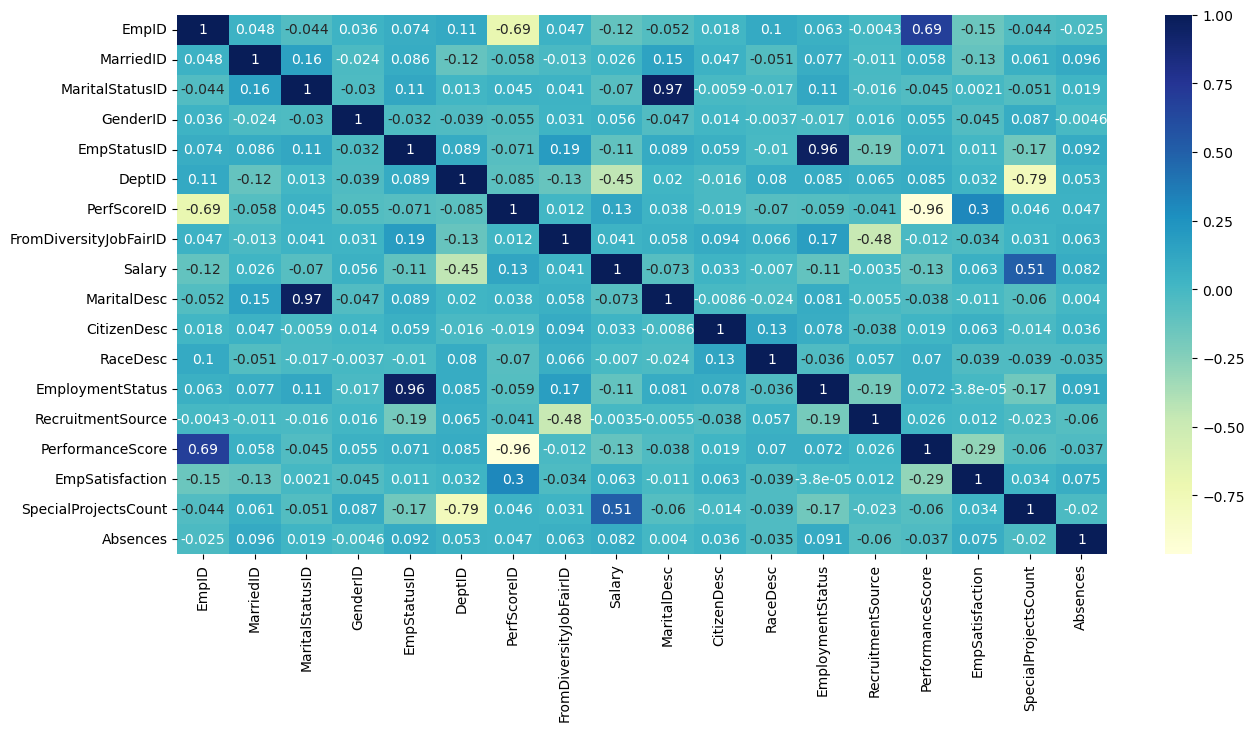

In [10]:
plt.figure(figsize = (15,7))
sns.heatmap(HRdata.corr(), cmap="YlGnBu",annot=True)

In [11]:
#Removing target column
HRdata = HRdata.drop(['Absences'], axis=1)

#### Kmean Clustering

In [12]:
scaler1=MinMaxScaler() #create an object

HRNdata=scaler1.fit_transform(HRdata) #perform range normalization

pd.DataFrame(HRNdata).head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,0.080645,0.0,0.00,1.0,0.0,0.8,1.000000,0.0,0.085190,0.00,0.0,0.0,0.0,0.571429,0.000000,1.00,0.00
1,0.267742,1.0,0.25,1.0,1.0,0.4,0.666667,0.0,0.289777,0.25,0.0,0.0,1.0,0.571429,0.333333,0.50,0.75
2,0.629032,1.0,0.25,0.0,1.0,0.8,0.666667,0.0,0.097139,0.25,0.0,0.0,1.0,0.571429,0.333333,0.50,0.00
3,0.280645,1.0,0.25,0.0,0.0,0.8,0.666667,0.0,0.097315,0.25,0.0,0.0,0.0,0.571429,0.333333,1.00,0.00
4,0.219355,0.0,0.50,0.0,1.0,0.8,0.666667,0.0,0.028197,0.50,0.0,0.0,1.0,0.428571,0.333333,0.75,0.00


In [13]:
kmeans = KMeans(n_clusters=3, random_state=0).fit(HRNdata)

HRdata['labels'] = kmeans.labels_

HRdata.head()

,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,MaritalDesc,CitizenDesc,RaceDesc,EmploymentStatus,RecruitmentSource,PerformanceScore,EmpSatisfaction,SpecialProjectsCount,labels
0,10026,0,0,1,1,5,4,0,62506,1,1,0,1,5,1,5,0,1
1,10084,1,1,1,5,3,3,0,104437,2,1,0,3,5,2,3,6,2
2,10196,1,1,0,5,5,3,0,64955,2,1,0,3,5,2,3,0,2
3,10088,1,1,0,1,5,3,0,64991,2,1,0,1,5,2,5,0,0
4,10069,0,2,0,5,5,3,0,50825,3,1,0,3,4,2,4,0,2


In [14]:
cluster_size=HRdata.groupby('labels').size() #get the size of the clusters
print(cluster_size)


cluster_profile=HRdata.groupby('labels').mean()
cluster_profile


labels
0    117
1     93
2    101
dtype: int64


,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,MaritalDesc,CitizenDesc,RaceDesc,EmploymentStatus,RecruitmentSource,PerformanceScore,EmpSatisfaction,SpecialProjectsCount
labels,,,,,,,,,,,,,,,,,
0,10143.316239,0.393162,0.769231,0.000000,1.222222,4.538462,3.051282,0.059829,70042.102564,1.820513,1.059829,0.769231,1.008547,4.427350,1.948718,3.923077,1.358974
1,10161.215054,0.354839,0.709677,1.000000,1.172043,4.548387,2.967742,0.064516,71639.344086,1.720430,1.086022,0.784946,1.021505,4.290323,2.032258,3.870968,1.666667
2,10165.891089,0.445545,0.950495,0.415842,4.871287,4.752475,2.900990,0.158416,65426.217822,1.920792,1.128713,0.683168,2.871287,3.772277,2.099010,3.871287,0.643564


#### Trying out different values of K

In [52]:
kmeans = KMeans(n_clusters=5, random_state=0).fit(HRNdata)

HRdata['labels'] = kmeans.labels_

HRdata.head()

,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,MaritalDesc,CitizenDesc,RaceDesc,EmploymentStatus,RecruitmentSource,PerformanceScore,EmpSatisfaction,SpecialProjectsCount,labels
0,10026,0,0,1,1,5,4,0,62506,1,1,0,1,5,1,5,0,1
1,10084,1,1,1,5,3,3,0,104437,2,1,0,3,5,2,3,6,3
2,10196,1,1,0,5,5,3,0,64955,2,1,0,3,5,2,3,0,3
3,10088,1,1,0,1,5,3,0,64991,2,1,0,1,5,2,5,0,4
4,10069,0,2,0,5,5,3,0,50825,3,1,0,3,4,2,4,0,2


In [54]:
cluster_size=HRdata.groupby('labels').size() #get the size of the clusters
print(cluster_size)


cluster_profile=HRdata.groupby('labels').mean()
cluster_profile

labels
0     12
1     91
2     56
3     45
4    107
dtype: int64


,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,MaritalDesc,CitizenDesc,RaceDesc,EmploymentStatus,RecruitmentSource,PerformanceScore,EmpSatisfaction,SpecialProjectsCount
labels,,,,,,,,,,,,,,,,,
0,10081.500000,0.250000,1.666667,0.166667,1.333333,3.333333,3.500000,0.666667,85086.000000,2.833333,1.000000,1.000000,1.000000,2.333333,1.500000,3.916667,3.750000
1,10164.285714,0.362637,0.681319,1.000000,1.175824,4.560440,2.945055,0.043956,71541.087912,1.692308,1.087912,0.780220,1.021978,4.340659,2.054945,3.868132,1.648352
2,10164.803571,0.000000,0.910714,0.410714,4.857143,4.839286,2.892857,0.142857,65479.625000,1.857143,1.089286,0.696429,2.857143,3.839286,2.107143,3.928571,0.607143
3,10167.244444,1.000000,1.000000,0.422222,4.888889,4.644444,2.911111,0.177778,65359.755556,2.000000,1.177778,0.666667,2.888889,3.688889,2.088889,3.800000,0.688889
4,10147.971963,0.401869,0.691589,0.000000,1.205607,4.663551,3.018692,0.009346,68468.355140,1.728972,1.065421,0.747664,1.009346,4.616822,1.981308,3.925234,1.112150


#### Discussion

#### Initiall clustering was performed with 3 clusters  n_clusters = 3
     This clustering analysis reveals actionable insights for HR strategies, such as employee satisfaction improvement, performance enhancement, and compensation adjustments.
     
      Then the dataset was then re-clustered with n_clusters = 5. Reviewing the distribition of datapoint across clusters =5 The dataset is divided into Cluster 0: 12 data points, Cluster 1: 91 data points, Cluster 2: 56 data points,
      Cluster 3: 45 data points, Cluster 4: 107 data points . We could see that the cluster sizes were unbalanced with cluster 4 being the largest. Cluster 4 had a diverse group characteristics.

      Cluster 0 had average salary of 85,000 , performance scores are the lowest across all 5 clusters and employees in this clusters are assigned more special projects. 
      Cluster 1 have salary  salary of approximately 75,000, performance is relatively higher compared to cluster 0, so we can conclude this group might include mid-level performers with average responsibilities.
      Cluster 2 have salary  salary of approximately 65,000, performance scores and satisfaction levels are high, this group have efficient, motivated employees with limited special projects, so we can conclude that this group of people 
      should be introduced/assigned more special projects.
      Cluster 3 also shows employees who are high-performing but not heavily involved in special projects.
      Cluster 4 Salary is approximately 64,000, employee satisfaction is among the highest, and we can draw a conclusion that this group may represent entry-level employees or those in support roles.

#### Recommendations
     For Cluster 0 we need to focus on understanding why employees with high salaries and responsibilities (special projects) have low performance scores, so training or workload redistribution might help this group of people.
     For the group in Cluster 1 who are termed Mid-level performers, they could be candidates for upskilling or promotion.
     Employees in Cluster 2 and Cluster 3 who are High-performing groups with varying satisfaction levels. We can keep these groups engaged with recognition and growth opportunities to avoid them loosing their motivation.
     Finally for Cluster 4 we can explore ways to retain this group with growth opportunities, as they may include entry-level or junior employees.
     
    
    